### Exemplo 1

Vamos calcular a transformada de Fourier para $f(t)$:

$ f(t) = e^{-a|t|} $

Lembrando que a função módulo é definida como:

$|t| =
  \begin{cases}
    t, & \quad \text{se } t > 0\\
    -t, & \quad \text{se } t < 0 
  \end{cases}
$

<p style="text-align:center">$ \hat{f}(\omega) = \displaystyle \int_{-\infty}^{\infty} f(t) e^{-i \omega t } dt$ </p>

<p style="text-align:center">$ \hat{f}(\omega) = \displaystyle \int_{-\infty}^{0} e^{-a(-t)} e^{-i \omega t } dt + \int_{0}^{\infty} e^{-at} e^{-i \omega t } dt$ </p>

<p style="text-align:center">$ \hat{f}(\omega) = \displaystyle \int_{-\infty}^{0} e^{t(a-i\omega)} dt + \int_{0}^{\infty} e^{-t(a+i\omega)} dt$ </p>

<p style="text-align:center">$ \hat{f}(\omega) = \left. \dfrac{e^{t(a-i\omega)}}{(a-i\omega)} \right|_{-\infty}^{0} + \left. \dfrac{e^{-t(a+i\omega)}}{-(a+i\omega)} \right|_{0}^{\infty}  $ </p>

<p style="text-align:center">$ \hat{f}(\omega) = \dfrac{2a}{a^2+\omega^2}  $ </p>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

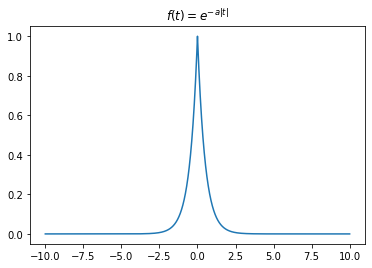

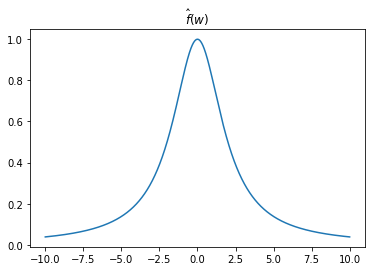

In [2]:
t = np.arange(-10,10,0.001)
a = 2
f = np.exp(-a*np.abs(t))

plt.plot(t,f)
plt.title("$f(t) = e^{-a|t|}$")
plt.show()

w = np.arange(-10,10,0.001)
f_w = (2*a)/(a**2 + w**2)

plt.plot(w,f_w)
plt.title("$\hat{f}(w)$")
plt.show()

**********

### Exemplo 2 

Qual a função cuja transformada de Fourier é a função caixa?

$ \hat{h}(\omega) =$ caixa, $ f(t) =$ $ ? $

Queremos calcular a transformada inversa de uma função caixa no domínio da frequência.

Se $ h(t) = \hat{g}(t) $, então $\hat{h}(\omega) = \dfrac{1}{2 \pi} g (-\omega)$

Ou seja, $ h(t) = \dfrac{1}{2\pi} 2A \dfrac{\sin(-ta)}{-t} = \dfrac{A}{\pi} \dfrac{\sin(ta)}{t} = \dfrac{Aa}{\pi} \cdot sinc(ta)$

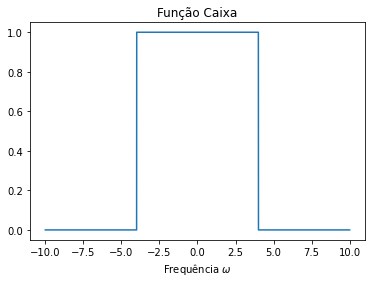

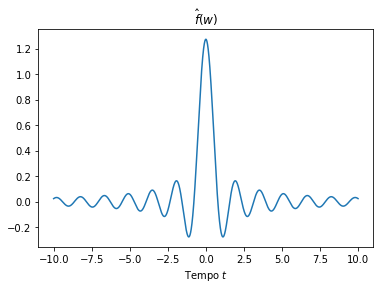

In [3]:
w = np.arange(-10,10,0.001)

a = 4
A = 1

f = np.ones(len(w))
f[abs(w)>a]=0

plt.plot(w,f)
plt.title("Função Caixa")
plt.xlabel("Frequência $\omega$")
plt.show()

t = np.arange(-10,10,0.001)
F = (A*a/np.pi)*np.sinc(t*a/np.pi)

plt.plot(t,F)
plt.title("$\hat{f}(w)$")
plt.xlabel("Tempo $t$")
plt.show()

********

### Exemplo 3

Vamos analisar o caso em que $ \hat{f}(\omega) = 1 $. Essa é também chamada de função branca, possui todas as frequências igualmente distribuídas no espectro.

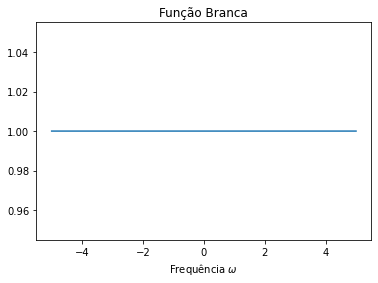

In [4]:
dt = 0.001
w = np.arange(-5,5,dt)
f = np.ones(len(w))

plt.plot(w,f)
plt.title("Função Branca")
plt.xlabel("Frequência $\omega$")
plt.show()

<p style="text-align:center">$ f(t) = \dfrac{1}{2\pi} \displaystyle \int_{-\infty}^{\infty} 1 e^{i \omega t } d\omega$ </p>

Essa é uma função indeterminada que é resolvida a partir do método do valor principal de Cauchy.

<p style="text-align:center">$ PV \displaystyle \int_{-\infty}^{\infty} e^{i \omega t} d\omega = \lim\limits_{k \to \infty} \displaystyle \int_{-k}^{k} e^{i \omega t} d\omega $ </p>


<p style="text-align:center">$ f(t) =
  \begin{cases}
    \infty, & \quad \text{se } t = 0\\
    0, & \quad \text{se } t \neq 0 
  \end{cases} $ </p>




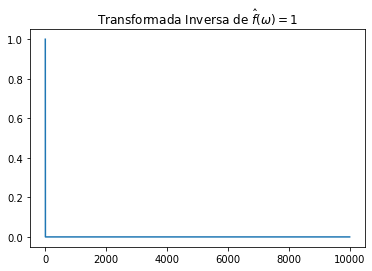

In [5]:
from scipy.fft import ifft

ft = ifft(f)

plt.plot(np.abs(ft))
plt.title("Transformada Inversa de $\hat{f}(\omega) = 1$")
plt.show()

Assim, temos um pulso perfeito em $t=0$. Essa **não é uma função**, mas sim uma **distribuição** que chamamos de delta de Dirac $\delta (t)$.

<p style="text-align:center">$ \delta (t) =
  \begin{cases}
    \infty, & \quad \text{se } t = 0\\
    0, & \quad \text{se } t \neq 0 
  \end{cases} $ </p>

********

### Exemplo 4

Vamos calcular a transformada da função seno de 2 Hz.

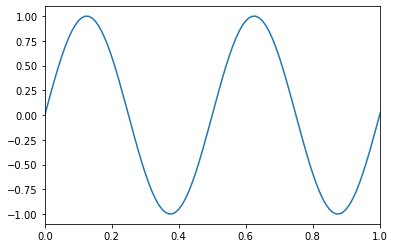

In [6]:
dt = 0.01
t = np.arange(0,10,dt)

fr_1 = 2
seno_1 = np.sin(2*np.pi*fr_1*t)

plt.plot(t,seno_1)
plt.xlim(0,1)
plt.show()

Para isso, temos que lembrar da relação de Euler.

<p style="text-align:center">$ \sin(2t) = \dfrac{e^{i2t} - e^{-i2t}}{2i} $ </p>

<p style="text-align:center">$ \hat{f}(\omega) = \displaystyle \int_{-\infty}^{\infty} \dfrac{e^{i2t} - e^{-i2t}}{2i} e^{-i\omega t} dt $ </p>

<p style="text-align:center">$ \hat{f}(\omega) = \displaystyle \int_{-\infty}^{\infty} \dfrac{1}{2i} ( e^{i2t} - e^{-i2t}) e^{-i\omega t} dt $ </p>

<p style="text-align:center">$ \hat{f}(\omega) = \displaystyle \int_{-\infty}^{\infty} \dfrac{1}{2i} ( e^{i2t} - e^{-i2t}) e^{-i\omega t} dt $ </p>

<p style="text-align:center">$ \hat{f}(\omega) = \displaystyle \dfrac{1}{2i} \left[ \int_{-\infty}^{\infty} ( e^{it (2 - \omega)} -  \int_{-\infty}^{\infty} ( e^{-it (2 + \omega)} \right] $ </p>

Considere que $ \delta (x) = \dfrac{1}{2\pi} \displaystyle \int_{-\infty}^{\infty} e^{iyx} dy $

Chame $y$ de $t$ e $x$ de $(2-\omega)$; então, podemos introduzir a delta de Dirac em nossa solução:

<p style="text-align:center">$ \hat{f}(\omega) = \dfrac{1}{2i} \left[ 2\pi\delta(2-\omega) - 2\pi\delta(2+\omega) \right] $ </p>

<p style="text-align:center">$ \hat{f}(\omega) = \dfrac{2\pi}{2i} \left[ \delta(2-\omega) - \delta(2+\omega) \right] $ </p>

<p style="text-align:center">$ \hat{f}(\omega) = \dfrac{\pi}{i} \left[ \delta(2-\omega) - \delta(2+\omega) \right] $ </p>

Assim, teremos dois pulsos: um pulso positivo em $\omega=2$ e um pulso negativo em $\omega=-2$. Como há um fator $ \dfrac{\pi}{i} $, os valores são complexos. Repare que é uma distribuição ímpar, assim como o seno.

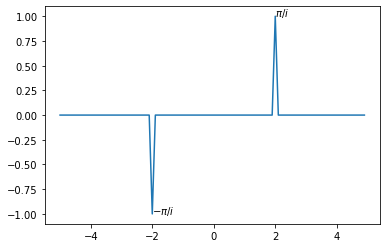

In [7]:
dt=0.1
t = np.arange(-5,5,dt)
f = np.zeros(len(t))

f[30]=-1
f[70]=1
        
plt.plot(t,f)
plt.text(-2, -1, "$-\pi/i$")
plt.text(2, 1, "$\pi/i$")
plt.show()

Ao calcular esta transformada por meio de um código, só nos importa a parte positiva das frequências; assim, teremos apenas o pulso positivo.

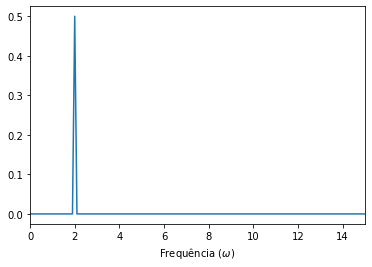

In [8]:
from scipy.fft import rfft, rfftfreq

dt = 0.01
t = np.arange(0,10,dt)

fr_1 = 2
seno_1 = np.sin(2*np.pi*fr_1*t)

fft_trace = rfft(seno_1)/len(seno_1) #transformada do nosso traço, normalizada
freq = rfftfreq(len(t),d=dt) #bins de frequência

plt.plot(freq,np.abs(fft_trace))
plt.xlim(0,15)
plt.xlabel("Frequência ($\omega$)")
plt.show()

****

### Exemplo 5

Da mesma forma, vamos calcular a transformada de uma função cosseno de 1/4 Hz.


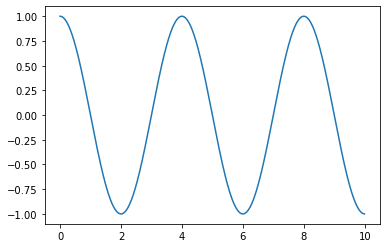

In [9]:
dt = 0.01
t = np.arange(0,10,dt)

fr_1 = 1/4
cosseno_1 = np.cos(2*np.pi*fr_1*t)

plt.plot(t,cosseno_1)
plt.show()

<p style="text-align:center">$ \cos(t/4) = \dfrac{e^{it/4} + e^{-it/4}}{2} $ </p>

<p style="text-align:center">$ \hat{f}(\omega) = \displaystyle \int_{-\infty}^{\infty} \dfrac{e^{it/4} + e^{-it/4}}{2} e^{-i\omega t} dt $ </p>

<p style="text-align:center">$ \hat{f}(\omega) = \displaystyle \int_{-\infty}^{\infty} \dfrac{1}{2} ( e^{it/4} + e^{-it/4}) e^{-i\omega t} dt $ </p>

<p style="text-align:center">$ \hat{f}(\omega) = \displaystyle \int_{-\infty}^{\infty} \dfrac{1}{2} ( e^{it/4} + e^{-it/4}) e^{-i\omega t} dt $ </p>

<p style="text-align:center">$ \hat{f}(\omega) = \displaystyle \dfrac{1}{2} \left[ \int_{-\infty}^{\infty} ( e^{it (1/4 - \omega)} dt +  \int_{-\infty}^{\infty} ( e^{-it (1/4 + \omega)} dt \right] $ </p>

Considere que $ \delta (x) = \dfrac{1}{2\pi} \displaystyle \int_{-\infty}^{\infty} e^{iyx} dy $

Chame $y$ de $t$ e $x$ de $(1/4-\omega)$; então, podemos introduzir a delta de Dirac em nossa solução:

<p style="text-align:center">$ \hat{f}(\omega) = \dfrac{1}{2} \left[ 2\pi\delta(1/4-\omega) + 2\pi\delta(1/4+\omega) \right] $ </p>

<p style="text-align:center">$ \hat{f}(\omega) = \dfrac{2\pi}{2} \left[ \delta(1/4-\omega) + \delta(1/4+\omega) \right] $ </p>

<p style="text-align:center">$ \hat{f}(\omega) = \pi \left[ \delta(1/4-\omega) + \delta(1/4+\omega) \right] $ </p>

Dessa vez, teremos dois pulsos positivos: um pulso em $\omega=1/4$ e um pulso em $\omega=-1/4$. Dessa vez há um fator $\pi$, de forma que os valores são reais. Repare que é uma distribuição par, assim como o cosseno.

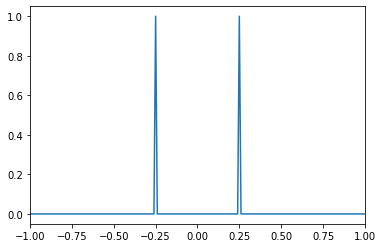

In [10]:
dt=0.01
t = np.arange(-5,5,dt)
f = np.zeros(len(t))

f[475]=1
f[525]=1
        
plt.plot(t,f)
plt.xlim(-1,1)
plt.show()

Ao calcular esta transformada por meio de um código, só nos importa a parte positiva das frequências; assim, teremos apenas o pulso positivo.

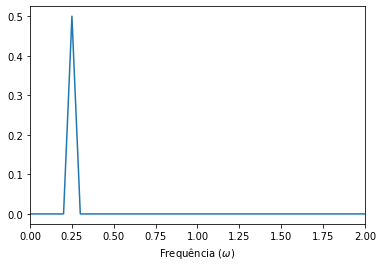

In [11]:
dt = 0.01
t = np.arange(0,20,dt)

fr_1 = 1/4
cosseno_1 = np.cos(2*np.pi*fr_1*t)

fft_trace = rfft(cosseno_1)/len(cosseno_1) #transformada do nosso traço, normalizada
freq = rfftfreq(len(t),d=dt) #bins de frequência

plt.plot(freq,np.abs(fft_trace))
plt.xlim(0,2)
plt.xlabel("Frequência ($\omega$)")
plt.show()